In [200]:
import pandas as pd 
import config
import plotly.express as px
import plotly.offline as pyo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
pd.set_option('display.max_rows', 500)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
px.set_mapbox_access_token("pk.eyJ1IjoidG9ueXBhcmswMDEiLCJhIjoiY2t2dWVramFmODZqaDJucXBrbnhpZ2JreCJ9.-XXf1YI8YESgWbWODhZAZA")


In [159]:
df = pd.read_csv("/Users/tonypark/Desktop/machine-learning-housing-project/communal/Ames_Housing_Price_Data_cleaned_3.csv")
pd.set_option('display.max_columns', None)
px.set_mapbox_access_token("pk.eyJ1IjoidG9ueXBhcmswMDEiLCJhIjoiY2t2dWVramFmODZqaDJucXBrbnhpZ2JreCJ9.-XXf1YI8YESgWbWODhZAZA")

In [160]:
df.drop("lot_bucket", axis=1, inplace = True)
df.drop("Prop_Addr", axis=1, inplace = True)
df.drop("mean_LotFrontage", axis=1, inplace = True)

In [161]:
df["GarageYrBlt"][df["GarageYrBlt"] == 'None'] = np.nan
df["GarageYrBlt"] = df["GarageYrBlt"].astype("float")

#if garage year build is na, replace with when house was built
#df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["YearBuilt"])
df.drop("GarageYrBlt", inplace=True, axis=1)

/Users/tonypark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Lasso without Feature Engineering

In [224]:
df["log_SalePrice"] = np.log(df["SalePrice"])

X = df.drop(["SalePrice","PID", "log_SalePrice"], axis=1)
y = df["log_SalePrice"]

In [357]:
#dummify X
X = pd.get_dummies(X, drop_first=True)

In [358]:
#min max scale the variables 
xscaler = MinMaxScaler()
x_train = xscaler.fit_transform(x_train)
x_test = xscaler.transform(x_test)

In [359]:
#test train split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [263]:
clf = linear_model.Lasso()

parameters = {'alpha':np.linspace(0.00001, 1000, 100), 
             }
gs = GridSearchCV(
    linear_model.Lasso(max_iter=1000), 
    parameters, 
    verbose= 3, 
    cv = 5,
    scoring='r2'
)


In [275]:
testr2 = []
trainr2 = []
clf = linear_model.Lasso(max_iter=2000)
for alpha in np.linspace(0.00001, 1000, 100):
    clf.set_params(alpha= alpha)
    clf.fit(x_train, y_train)
    trainr2.append(clf.score(x_train, y_train))
    testr2.append(clf.score(x_test, y_test))


/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.390e+00, tolerance: 2.769e-02



In [ ]:
list(zip(list(gs.best_estimator_.coef_), list(X.columns)))

In [565]:
##MSE 
mean_squared_error(gs.predict(xscaler.transform(x_test)), y_test)

/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



9232246759.990479

In [279]:
##get feature importance 
co  = list(zip(list(gs.best_estimator_.coef_), list(X.columns)))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## Feature Cleaning & Engineering

In [6]:
#drop PID 
df.drop("PID", axis=1, inplace=True)

In [7]:
#remove outliers 
df.drop([115, 132, 141, 335, 490, 538, 2047, 2239], inplace=True) 

In [365]:
# #categorize neighborhoods 
# df =df.replace("Landmrk", "OldTown")
# df =df.replace("GrnHill", "OldTown")
# df =df.replace("NoRidge", "Somerst")
# df =df.replace("StoneBr", "Somerst")
# df =df.replace("NWAmes", "Gilbert")
# df =df.replace("Veenker", "Somerst")
# df =df.replace("NridgHt", "Somerst")
# df =df.replace("Blmngtn", "Gilbert")
# df =df.replace("Sawyer", "OldTown")
# df =df.replace("Edwards", "OldTown")
# df =df.replace("BrkSide", "OldTown")
# df =df.replace("SWISU", "OldTown")
# df =df.replace("CollgCr", "SawyerW")
# df =df.replace("Crawfor", "Timber")
# df =df.replace("Blueste", "OldTown")
# df =df.replace("ClearCr", "SawyerW")
# df =df.replace("IDOTRR", "OldTown")
# df =df.replace("BrDale", "NAmes")
# df =df.replace("NPkVill", "NAmes")
# df =df.replace("Greens", "Somerst")
# df =df.replace("MeadowV", "OldTown")

In [230]:
# #convert MoSold to object to be dummified 
# df["MoSold"]=df["MoSold"].astype("str")
# df.drop("YrSold", inplace=True, axis=1)

In [8]:
#identify categorical vs numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = list(df.select_dtypes(include=numerics).columns)
categorical_columns =list(df.drop(numeric_columns, axis=1).columns)


In [9]:
#number of bathrooms
df["Num_of_Bath"] = df["BsmtFullBath"] + 0.5* df["BsmtHalfBath"] + df["FullBath"] + 0.5*df["HalfBath"]
df.drop(["FullBath", 'BsmtFullBath',"BsmtHalfBath","HalfBath"], axis=1, inplace=True)


In [10]:
#drop lat and long 
df.drop(["lat","long"], axis=1, inplace=True)

#has a second floor

#has a pool 

#has a garage

#has a basement 

#has a fireplace


#take the log of grLivARea
df["log_GrLivArea"] = np.log(df["GrLivArea"])
df.drop("GrLivArea", axis=1, inplace=True)

#total_living_SF
# df["square_footage_1"] = df["GrLivArea"] + df["TotalBsmtSF"] + df["GarageArea"]

#OverallQual * OverallCond 
df["total_cond"] = df["OverallQual"] * df["OverallCond"]
df.drop(["OverallQual","OverallCond"], axis=1, inplace=True)


#dropping all square footage that add up to grlivearea
# df.drop(["1stFlrSF", "2ndFlrSF", "BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF"], inplace=True, axis=1)
# df.drop(["BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF"], inplace=True, axis=1)


In [234]:
##ordinal categorie
# dict_1 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1, 'None':0}
# dict_2 = {'Gd':4, 'Av':3, 'Mn':2, 'No':1,'None':0}
# dict_3 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0}
# df["ExterQual"] = df["ExterQual"].apply(lambda x: dict_1[x])
# df["ExterCond"] = df["ExterCond"].apply(lambda x: dict_1[x])
# df["BsmtQual"] = df["BsmtQual"].apply(lambda x: dict_1[x])
# df["BsmtCond"] = df["BsmtCond"].apply(lambda x: dict_1[x])
# df["BsmtExposure"] = df["BsmtExposure"].apply(lambda x: dict_2[x])
# df["BsmtFinType1"] = df["BsmtFinType1"].apply(lambda x: dict_3[x])
# df["HeatingQC"] = df["HeatingQC"].apply(lambda x: dict_1[x])
# df["KitchenQual"] = df["KitchenQual"].apply(lambda x: dict_1[x])
# df["FireplaceQu"] = df["FireplaceQu"].apply(lambda x: dict_1[x])
# df["GarageQual"] = df["GarageQual"].apply(lambda x: dict_1[x])
# df["GarageCond"] = df["GarageCond"].apply(lambda x: dict_1[x])



## Lasso With Features Reduced and Engineered 

In [36]:
df["log_SalePrice"] = np.log(df["SalePrice"])

In [18]:
y = df["log_SalePrice"]

In [19]:
X = df.drop(["SalePrice","log_SalePrice"], axis=1)

In [20]:
X = pd.get_dummies(X, drop_first=True)

In [15]:
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)

In [16]:
# xscaler = MinMaxScaler()
# x_train = xscaler.fit_transform(x_train)
# x_test = xscaler.transform(x_test)

In [21]:
lasso = linear_model.Lasso(max_iter = 1000)
trainR2= []
testR2 = []
alphas = np.linspace(1e-5, 1e-3,100)
for i ,alpha in enumerate(alphas):
    
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)
    xscaler = MinMaxScaler()
    x_train = xscaler.fit_transform(x_train)
    x_test = xscaler.transform(x_test)

    lasso.set_params(alpha = alpha)
    lasso.fit(x_train, y_train)
    

        
    trainR2.append(lasso.score(x_train, y_train))
    testR2.append(lasso.score(x_test, y_test))
    print(i, end = '\r')
        
    
best_alpha = alphas[np.argmax(testR2)]
lasso.set_params(alpha = best_alpha)

best_coefs = pd.Series(lasso.coef_, index = X.columns)

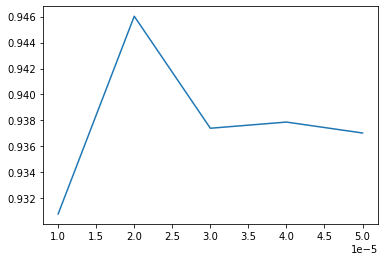

In [22]:
plt.plot(alphas[:5], trainR2[:5])

In [239]:
# lasso = linear_model.Lasso(max_iter = 20000)
# trainR2= []
# testR2 = []
# alphas = np.linspace(1e-5, 1e-3,1000)
# for i ,alpha in enumerate(alphas):
    
# #     x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)
# #     xscaler = MinMaxScaler()
# #     x_train = xscaler.fit_transform(x_train)
# #     x_test = xscaler.transform(x_test)
#     x_train_avg = []
#     x_test_avg = []
    
#     for j in range(3):
        
#         x_train, x_test, y_train, y_test = \
#         train_test_split(X.to_numpy(),y.to_numpy(), test_size= 0.33)
        
#         xscaler = MinMaxScaler()
#         x_train = xscaler.fit_transform(x_train)
#         x_test = xscaler.transform(x_test)
    
#         lasso.set_params(alpha = alpha)
#         lasso.fit(x_train, y_train)
        
#         x_train_avg.append(lasso.score(x_train, y_train))
#         x_test_avg.append(lasso.score(x_test, y_test))

        
#     trainR2.append(np.mean(x_train_avg))
#     testR2.append(np.mean(x_test_avg))
#     print(i, end = '\r')
        
    
# best_alpha = alphas[np.argmax(testR2)]
# lasso.set_params(alpha = best_alpha)

# best_coefs = pd.Series(lasso.coef_, index = X.columns)

    
    

In [23]:
y = lasso.set_params(alpha = alpha).fit(x_train, y_train)

In [24]:
sorted(list(zip(y.coef_, X.columns)), key=lambda x: abs(x[0]), reverse=True) 

[(0.9190521424246304, 'log_GrLivArea'),
 (0.7493955312851869, 'total_cond'),
 (0.3912367672386313, 'TotalBsmtSF'),
 (0.24526823330913045, 'YearBuilt'),
 (0.15723448162891074, 'BsmtFinSF1'),
 (0.08776807556640022, 'GarageArea'),
 (0.07869158704797555, 'Neighborhood_Somerst'),
 (0.0786915853771345, 'CentralAir_Y'),
 (0.07787165879580851, 'Num_of_Bath'),
 (0.07352105350809246, 'Exterior1st_BrkFace'),
 (-0.07331715181686356, 'BldgType_Twnhs'),
 (0.06825298839966891, 'GarageCars'),
 (0.06657726737054527, 'Neighborhood_Crawfor'),
 (-0.06307394570207377, 'KitchenQual_TA'),
 (0.06026524542027907, 'Neighborhood_StoneBr'),
 (0.05933837803758788, 'MasVnrArea'),
 (0.05518503233539976, 'BsmtExposure_Gd'),
 (0.054396031087483886, 'Neighborhood_NoRidge'),
 (0.052274242336824074, 'Neighborhood_NridgHt'),
 (0.05130881994558507, 'MSZoning_RL'),
 (0.050338193725819845, 'GarageCond_TA'),
 (-0.04917162019631061, 'ExterCond_Fa'),
 (0.0433837124273803, '2ndFlrSF'),
 (-0.04018089602776583, 'MSSubClass'),
 (-0

In [25]:
max(testR2)

0.9327593657492852

In [26]:
trainR2[np.argmax(testR2)]

0.9277513109900583

In [193]:
def calc_vif(data):
    vif = {}
    for feature in data.columns:
        X = [f for f in data.columns if f != feature]
        X = data[X]
        y = data[feature]
        r2 = linear_model.LinearRegression().fit(X,y).score(X,y)
        vif[feature] = 1/(1-r2)
    return pd.DataFrame.from_dict([vif]).T.sort_values(ascending = False, by = 0)

In [223]:
calc_vif(X[sorted_best_coefs[:20]["index"].values[:15]])

,0
square_footage_1,5.718855
GrLivArea,4.300150
OverallQual,3.085383
YearRemodAdd,1.900518
KitchenQual_TA,1.804537
Neighborhood_OldTown,1.759417
Neighborhood_Somerst,1.695000
HeatingQC_Ex,1.495640
GarageType_Attchd,1.480302
BsmtFinType1_GLQ,1.432999


## Random Forest


In [163]:
df["log_SalePrice"] = np.log(df["SalePrice"])

In [139]:
y = df["log_SalePrice"]

In [140]:
X = df.drop(["SalePrice","log_SalePrice"], axis=1)

In [141]:
X = pd.get_dummies(X, drop_first=True)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)

In [143]:
x_train

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,TotalPorchSF,Num_of_Bath,log_GrLivArea,total_cond,MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
858,180,35.0,3675,2005,2006,82.0,547.0,0.0,0.0,547.0,1072,0,0,2,5,0,2.0,525.0,0,10,2006,44,2.0,6.977281,30,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1211,80,74.1,10147,1994,1994,32.0,186.0,0.0,206.0,392.0,924,770,0,3,7,1,2.0,398.0,256,3,2007,64,2.5,7.434848,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
859,50,44.0,13758,1990,1991,117.0,902.0,0.0,254.0,1156.0,1187,530,0,3,7,1,2.0,400.0,168,4,2007,36,2.5,7.448334,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
371,20,60.0,7200,1950,1950,0.0,534.0,96.0,246.0,876.0,988,0,0,3,6,0,1.0,276.0,0,5,2007,80,1.0,6.895683,35,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
1514,20,66.5,20781,1968,2003,0.0,29

In [144]:
### implement random
clf = AdaBoostRegressor(random_state=0)

In [145]:
parameter = {
    "n_estimators":np.linspace(1, 100, 30).astype("int"), 
    "learning_rate":np.linspace(0.5,1, 10)
}



In [146]:
cv = GridSearchCV( clf, param_grid=parameter, cv = 3, verbose=3)

In [147]:
cv.fit(x_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV 1/3] END ...learning_rate=0.0, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END ...learning_rate=0.0, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END ...learning_rate=0.0, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END ...learning_rate=0.0, n_estimators=4;, score=nan total time=   0.0s
[CV 2/3] END ...learning_rate=0.0, n_estimators=4;, score=nan total time=   0.0s
[CV 3/3] END ...learning_rate=0.0, n_estimators=4;, score=nan total time=   0.0s
[CV 1/3] END ...learning_rate=0.0, n_estimators=7;, score=nan total time=   0.0s
[CV 2/3] END ...learning_rate=0.0, n_estimators=7;, score=nan total time=   0.0s
[CV 3/3] END ...learning_rate=0.0, n_estimators=7;, score=nan total time=   0.0s
[CV 1/3] END ..learning_rate=0.0, n_estimators=11;, score=nan total time=   0.0s
[CV 2/3] END ..learning_rate=0.0, n_estimators=11;, score=nan total time=   0.0s
[CV 3/3] END ..learning_rate=0.0, n_estimators

[CV 1/3] END learning_rate=0.1111111111111111, n_estimators=11;, score=0.734 total time=   0.3s
[CV 2/3] END learning_rate=0.1111111111111111, n_estimators=11;, score=0.791 total time=   0.1s
[CV 3/3] END learning_rate=0.1111111111111111, n_estimators=11;, score=0.716 total time=   0.2s
[CV 1/3] END learning_rate=0.1111111111111111, n_estimators=14;, score=0.739 total time=   0.2s
[CV 2/3] END learning_rate=0.1111111111111111, n_estimators=14;, score=0.805 total time=   0.2s
[CV 3/3] END learning_rate=0.1111111111111111, n_estimators=14;, score=0.716 total time=   0.2s
[CV 1/3] END learning_rate=0.1111111111111111, n_estimators=18;, score=0.743 total time=   0.3s
[CV 2/3] END learning_rate=0.1111111111111111, n_estimators=18;, score=0.805 total time=   0.3s
[CV 3/3] END learning_rate=0.1111111111111111, n_estimators=18;, score=0.734 total time=   0.3s
[CV 1/3] END learning_rate=0.1111111111111111, n_estimators=21;, score=0.749 total time=   0.3s
[CV 2/3] END learning_rate=0.11111111111

[CV 1/3] END learning_rate=0.2222222222222222, n_estimators=7;, score=0.732 total time=   0.1s
[CV 2/3] END learning_rate=0.2222222222222222, n_estimators=7;, score=0.766 total time=   0.1s
[CV 3/3] END learning_rate=0.2222222222222222, n_estimators=7;, score=0.693 total time=   0.1s
[CV 1/3] END learning_rate=0.2222222222222222, n_estimators=11;, score=0.752 total time=   0.2s
[CV 2/3] END learning_rate=0.2222222222222222, n_estimators=11;, score=0.799 total time=   0.2s
[CV 3/3] END learning_rate=0.2222222222222222, n_estimators=11;, score=0.730 total time=   0.2s
[CV 1/3] END learning_rate=0.2222222222222222, n_estimators=14;, score=0.750 total time=   0.2s
[CV 2/3] END learning_rate=0.2222222222222222, n_estimators=14;, score=0.804 total time=   0.2s
[CV 3/3] END learning_rate=0.2222222222222222, n_estimators=14;, score=0.750 total time=   0.2s
[CV 1/3] END learning_rate=0.2222222222222222, n_estimators=18;, score=0.764 total time=   0.6s
[CV 2/3] END learning_rate=0.22222222222222

[CV 1/3] END learning_rate=0.3333333333333333, n_estimators=4;, score=0.711 total time=   0.1s
[CV 2/3] END learning_rate=0.3333333333333333, n_estimators=4;, score=0.759 total time=   0.1s
[CV 3/3] END learning_rate=0.3333333333333333, n_estimators=4;, score=0.689 total time=   0.1s
[CV 1/3] END learning_rate=0.3333333333333333, n_estimators=7;, score=0.756 total time=   0.1s
[CV 2/3] END learning_rate=0.3333333333333333, n_estimators=7;, score=0.806 total time=   0.1s
[CV 3/3] END learning_rate=0.3333333333333333, n_estimators=7;, score=0.735 total time=   0.1s
[CV 1/3] END learning_rate=0.3333333333333333, n_estimators=11;, score=0.765 total time=   0.2s
[CV 2/3] END learning_rate=0.3333333333333333, n_estimators=11;, score=0.806 total time=   0.1s
[CV 3/3] END learning_rate=0.3333333333333333, n_estimators=11;, score=0.737 total time=   0.2s
[CV 1/3] END learning_rate=0.3333333333333333, n_estimators=14;, score=0.774 total time=   0.2s
[CV 2/3] END learning_rate=0.3333333333333333,

[CV 3/3] END learning_rate=0.3333333333333333, n_estimators=100;, score=0.807 total time=   1.6s
[CV 1/3] END learning_rate=0.4444444444444444, n_estimators=1;, score=0.629 total time=   0.0s
[CV 2/3] END learning_rate=0.4444444444444444, n_estimators=1;, score=0.672 total time=   0.0s
[CV 3/3] END learning_rate=0.4444444444444444, n_estimators=1;, score=0.646 total time=   0.1s
[CV 1/3] END learning_rate=0.4444444444444444, n_estimators=4;, score=0.711 total time=   0.1s
[CV 2/3] END learning_rate=0.4444444444444444, n_estimators=4;, score=0.722 total time=   0.1s
[CV 3/3] END learning_rate=0.4444444444444444, n_estimators=4;, score=0.745 total time=   0.1s
[CV 1/3] END learning_rate=0.4444444444444444, n_estimators=7;, score=0.749 total time=   0.1s
[CV 2/3] END learning_rate=0.4444444444444444, n_estimators=7;, score=0.758 total time=   0.1s
[CV 3/3] END learning_rate=0.4444444444444444, n_estimators=7;, score=0.726 total time=   0.1s
[CV 1/3] END learning_rate=0.4444444444444444, n

[CV 2/3] END learning_rate=0.4444444444444444, n_estimators=96;, score=0.835 total time=   1.3s
[CV 3/3] END learning_rate=0.4444444444444444, n_estimators=96;, score=0.815 total time=   2.9s
[CV 1/3] END learning_rate=0.4444444444444444, n_estimators=100;, score=0.803 total time=   1.4s
[CV 2/3] END learning_rate=0.4444444444444444, n_estimators=100;, score=0.833 total time=   1.1s
[CV 3/3] END learning_rate=0.4444444444444444, n_estimators=100;, score=0.814 total time=   1.8s
[CV 1/3] END learning_rate=0.5555555555555556, n_estimators=1;, score=0.629 total time=   0.2s
[CV 2/3] END learning_rate=0.5555555555555556, n_estimators=1;, score=0.672 total time=   0.1s
[CV 3/3] END learning_rate=0.5555555555555556, n_estimators=1;, score=0.646 total time=   0.1s
[CV 1/3] END learning_rate=0.5555555555555556, n_estimators=4;, score=0.728 total time=   0.2s
[CV 2/3] END learning_rate=0.5555555555555556, n_estimators=4;, score=0.739 total time=   0.2s
[CV 3/3] END learning_rate=0.5555555555555

[CV 1/3] END learning_rate=0.5555555555555556, n_estimators=93;, score=0.810 total time=   1.6s
[CV 2/3] END learning_rate=0.5555555555555556, n_estimators=93;, score=0.836 total time=   1.6s
[CV 3/3] END learning_rate=0.5555555555555556, n_estimators=93;, score=0.814 total time=   1.7s
[CV 1/3] END learning_rate=0.5555555555555556, n_estimators=96;, score=0.810 total time=   2.0s
[CV 2/3] END learning_rate=0.5555555555555556, n_estimators=96;, score=0.833 total time=   1.9s
[CV 3/3] END learning_rate=0.5555555555555556, n_estimators=96;, score=0.814 total time=   1.1s
[CV 1/3] END learning_rate=0.5555555555555556, n_estimators=100;, score=0.810 total time=   1.1s
[CV 2/3] END learning_rate=0.5555555555555556, n_estimators=100;, score=0.836 total time=   1.4s
[CV 3/3] END learning_rate=0.5555555555555556, n_estimators=100;, score=0.811 total time=   1.3s
[CV 1/3] END learning_rate=0.6666666666666666, n_estimators=1;, score=0.629 total time=   0.0s
[CV 2/3] END learning_rate=0.666666666

[CV 3/3] END learning_rate=0.6666666666666666, n_estimators=86;, score=0.816 total time=   0.8s
[CV 1/3] END learning_rate=0.6666666666666666, n_estimators=89;, score=0.805 total time=   0.9s
[CV 2/3] END learning_rate=0.6666666666666666, n_estimators=89;, score=0.829 total time=   0.9s
[CV 3/3] END learning_rate=0.6666666666666666, n_estimators=89;, score=0.817 total time=   1.2s
[CV 1/3] END learning_rate=0.6666666666666666, n_estimators=93;, score=0.806 total time=   1.0s
[CV 2/3] END learning_rate=0.6666666666666666, n_estimators=93;, score=0.829 total time=   2.0s
[CV 3/3] END learning_rate=0.6666666666666666, n_estimators=93;, score=0.818 total time=   2.3s
[CV 1/3] END learning_rate=0.6666666666666666, n_estimators=96;, score=0.806 total time=   2.4s
[CV 2/3] END learning_rate=0.6666666666666666, n_estimators=96;, score=0.829 total time=   4.0s
[CV 3/3] END learning_rate=0.6666666666666666, n_estimators=96;, score=0.818 total time=   5.3s
[CV 1/3] END learning_rate=0.66666666666

[CV 2/3] END learning_rate=0.7777777777777777, n_estimators=82;, score=0.829 total time=   0.9s
[CV 3/3] END learning_rate=0.7777777777777777, n_estimators=82;, score=0.825 total time=   0.9s
[CV 1/3] END learning_rate=0.7777777777777777, n_estimators=86;, score=0.808 total time=   1.1s
[CV 2/3] END learning_rate=0.7777777777777777, n_estimators=86;, score=0.831 total time=   0.9s
[CV 3/3] END learning_rate=0.7777777777777777, n_estimators=86;, score=0.826 total time=   0.8s
[CV 1/3] END learning_rate=0.7777777777777777, n_estimators=89;, score=0.808 total time=   0.9s
[CV 2/3] END learning_rate=0.7777777777777777, n_estimators=89;, score=0.827 total time=   0.9s
[CV 3/3] END learning_rate=0.7777777777777777, n_estimators=89;, score=0.824 total time=   1.3s
[CV 1/3] END learning_rate=0.7777777777777777, n_estimators=93;, score=0.808 total time=   1.2s
[CV 2/3] END learning_rate=0.7777777777777777, n_estimators=93;, score=0.828 total time=   0.9s
[CV 3/3] END learning_rate=0.77777777777

[CV 1/3] END learning_rate=0.8888888888888888, n_estimators=79;, score=0.812 total time=   0.8s
[CV 2/3] END learning_rate=0.8888888888888888, n_estimators=79;, score=0.833 total time=   0.8s
[CV 3/3] END learning_rate=0.8888888888888888, n_estimators=79;, score=0.820 total time=   0.9s
[CV 1/3] END learning_rate=0.8888888888888888, n_estimators=82;, score=0.813 total time=   0.8s
[CV 2/3] END learning_rate=0.8888888888888888, n_estimators=82;, score=0.833 total time=   0.8s
[CV 3/3] END learning_rate=0.8888888888888888, n_estimators=82;, score=0.821 total time=   0.9s
[CV 1/3] END learning_rate=0.8888888888888888, n_estimators=86;, score=0.812 total time=   0.8s
[CV 2/3] END learning_rate=0.8888888888888888, n_estimators=86;, score=0.833 total time=   0.9s
[CV 3/3] END learning_rate=0.8888888888888888, n_estimators=86;, score=0.821 total time=   0.9s
[CV 1/3] END learning_rate=0.8888888888888888, n_estimators=89;, score=0.813 total time=   0.9s
[CV 2/3] END learning_rate=0.88888888888

[CV 3/3] END learning_rate=1.0, n_estimators=86;, score=0.826 total time=   1.0s
[CV 1/3] END learning_rate=1.0, n_estimators=89;, score=0.811 total time=   1.0s
[CV 2/3] END learning_rate=1.0, n_estimators=89;, score=0.833 total time=   0.9s
[CV 3/3] END learning_rate=1.0, n_estimators=89;, score=0.823 total time=   0.9s
[CV 1/3] END learning_rate=1.0, n_estimators=93;, score=0.810 total time=   1.0s
[CV 2/3] END learning_rate=1.0, n_estimators=93;, score=0.832 total time=   1.1s
[CV 3/3] END learning_rate=1.0, n_estimators=93;, score=0.823 total time=   1.1s
[CV 1/3] END learning_rate=1.0, n_estimators=96;, score=0.809 total time=   1.0s
[CV 2/3] END learning_rate=1.0, n_estimators=96;, score=0.833 total time=   1.1s
[CV 3/3] END learning_rate=1.0, n_estimators=96;, score=0.826 total time=   1.2s
[CV 1/3] END learning_rate=1.0, n_estimators=100;, score=0.810 total time=   1.1s
[CV 2/3] END learning_rate=1.0, n_estimators=100;, score=0.833 total time=   1.1s
[CV 3/3] END learning_rate

/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


90 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 1071, in fit
    return super().fit(X, y, sample_weight)
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 114, in fit
    r

GridSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'learning_rate': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'n_estimators': array([  1,   4,   7,  11,  14,  18,  21,  24,  28,  31,  35,  38,  41,
        45,  48,  52,  55,  59,  62,  65,  69,  72,  76,  79,  82,  86,
        89,  93,  96, 100])},
             verbose=3)

In [222]:
kmeans = KMeans(max_iter = 10000, verbose = 3, random_state = 1)

In [239]:
neigh_df = df[["lat", "long","log_SalePrice"]]

In [240]:
neigh_df

,lat,long,log_SalePrice
0,42.017780,-93.651452,11.744037
1,42.024697,-93.664186,11.845820
2,42.024697,-93.664186,11.845820
3,42.021389,-93.614855,11.735269
4,42.038070,-93.612065,11.643954
...,...,...,...
2619,42.031937,-93.626510,11.703546
2620,42.027798,-93.666899,11.846536
2621,42.019944,-93.643206,11.884489
2622,42.016826,-93.690382,12.289954


In [241]:
cluster_list = [2,3,4,5,6,7,8,9,10,11,12,13,14]

In [242]:
score = []
for cluster in cluster_list:
    kmeans.set_params(n_clusters=cluster)
    kmeans.fit(neigh_df)
    score.append(silhouette_score(neigh_df, kmeans.predict(neigh_df)))
    

Initialization complete
Iteration 0, inertia 214.1450138017628
Iteration 1, inertia 172.82424809002225
Iteration 2, inertia 167.37957412120483
Iteration 3, inertia 164.56604622052538
Iteration 4, inertia 162.91646548089898
Iteration 5, inertia 162.1732155791692
Iteration 6, inertia 161.89416098339166
Iteration 7, inertia 161.71689366473043
Iteration 8, inertia 161.64475297862526
Iteration 9, inertia 161.6149859165761
Converged at iteration 9: center shift 1.8810489320790302e-06 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 228.3163741551376
Iteration 1, inertia 161.99095088692926
Iteration 2, inertia 161.6933614714664
Iteration 3, inertia 161.6039405875855
Converged at iteration 3: center shift 4.118651229469241e-06 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 189.00505848277317
Iteration 1, inertia 171.28155113636896
Iteration 2, inertia 166.7125003609752
Iteration 3, inertia 164.0946230170954
Iteration 4, in

Initialization complete
Iteration 0, inertia 114.54812447931121
Iteration 1, inertia 96.2207320350206
Iteration 2, inertia 95.2768562837909
Iteration 3, inertia 95.12055387178701
Iteration 4, inertia 95.08913434597811
Iteration 5, inertia 95.07499888974002
Converged at iteration 5: center shift 4.1191293527746845e-07 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 107.449958194597
Iteration 1, inertia 97.04209693377511
Iteration 2, inertia 96.37329668137818
Iteration 3, inertia 96.11030137348207
Iteration 4, inertia 95.84238972526518
Iteration 5, inertia 95.41349260605277
Iteration 6, inertia 95.30953042524845
Iteration 7, inertia 95.23313528397776
Iteration 8, inertia 95.18014787155477
Iteration 9, inertia 95.16591711011077
Converged at iteration 9: center shift 9.576095040412415e-07 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 151.3168077926886
Iteration 1, inertia 107.1231857042299
Iteration 2, inertia 98.101

Iteration 1, inertia 59.53773110129202
Iteration 2, inertia 59.27119060128122
Iteration 3, inertia 59.13834678639475
Iteration 4, inertia 59.05512596317884
Iteration 5, inertia 58.94108440114223
Iteration 6, inertia 58.89656789197923
Iteration 7, inertia 58.87750758994491
Iteration 8, inertia 58.83607174504631
Iteration 9, inertia 58.806069715281986
Iteration 10, inertia 58.71763215784261
Iteration 11, inertia 58.649148722843606
Iteration 12, inertia 58.62481860722366
Iteration 13, inertia 58.62068161602897
Converged at iteration 13: center shift 7.301974404535946e-08 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 47.3418043158931
Iteration 1, inertia 42.79199812173252
Iteration 2, inertia 42.23108751986503
Iteration 3, inertia 42.00578761699633
Iteration 4, inertia 41.90768516842853
Iteration 5, inertia 41.8844747587863
Iteration 6, inertia 41.87785032122494
Iteration 7, inertia 41.85418108536959
Iteration 8, inertia 41.82420349171041
Iteration 9, 

Initialization complete
Iteration 0, inertia 40.51992302119567
Iteration 1, inertia 35.203048410396654
Iteration 2, inertia 34.42207300369417
Iteration 3, inertia 33.694720517120025
Iteration 4, inertia 33.15503558209249
Iteration 5, inertia 32.91253914152461
Iteration 6, inertia 32.59935706711345
Iteration 7, inertia 32.464592648467416
Iteration 8, inertia 32.39684403240176
Iteration 9, inertia 32.3438680072961
Iteration 10, inertia 32.310155604283175
Iteration 11, inertia 32.29054042218564
Iteration 12, inertia 32.27877004278066
Converged at iteration 12: center shift 3.670262285375269e-06 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 40.374433169609496
Iteration 1, inertia 33.05476744188573
Iteration 2, inertia 32.36592522126307
Iteration 3, inertia 32.23278332332815
Iteration 4, inertia 32.17673226740067
Iteration 5, inertia 32.159851751973136
Iteration 6, inertia 32.129490747667525
Iteration 7, inertia 32.09612282974419
Iteration 8, inertia 32

Iteration 3, inertia 27.948944109220466
Iteration 4, inertia 26.623798213155695
Iteration 5, inertia 26.00201410600936
Iteration 6, inertia 25.864740479813577
Iteration 7, inertia 25.813043889468837
Iteration 8, inertia 25.786059712256048
Converged at iteration 8: center shift 4.630467654904358e-06 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 28.911221859342632
Iteration 1, inertia 26.32914952058936
Iteration 2, inertia 26.21399699676518
Iteration 3, inertia 26.1651422841153
Iteration 4, inertia 26.135357954839844
Iteration 5, inertia 26.008906937268993
Iteration 6, inertia 25.854290186026272
Iteration 7, inertia 25.79404602094377
Iteration 8, inertia 25.732002813676917
Iteration 9, inertia 25.676036329366518
Iteration 10, inertia 25.669071026082374
Iteration 11, inertia 25.66274174629482
Converged at iteration 11: center shift 4.882709243976115e-07 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 33.978301066895

Iteration 14, inertia 22.97840918494707
Iteration 15, inertia 22.96532912928823
Iteration 16, inertia 22.93914057307705
Iteration 17, inertia 22.923339387932753
Iteration 18, inertia 22.90914366226034
Iteration 19, inertia 22.903280942593895
Converged at iteration 19: center shift 1.7625569078621262e-06 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 27.78735002240063
Iteration 1, inertia 21.686851321934856
Iteration 2, inertia 20.8941097561897
Iteration 3, inertia 20.543242256337663
Iteration 4, inertia 20.38420792630575
Iteration 5, inertia 20.295170861483385
Iteration 6, inertia 20.249194558295123
Iteration 7, inertia 20.236155762719
Converged at iteration 7: center shift 4.360213762126967e-06 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 29.166691180311574
Iteration 1, inertia 23.279095844798515
Iteration 2, inertia 22.568685185504616
Iteration 3, inertia 22.405011216508832
Iteration 4, inertia 22.27050011110

Initialization complete
Iteration 0, inertia 18.42073477607679
Iteration 1, inertia 15.162603787489433
Iteration 2, inertia 14.983027845594728
Iteration 3, inertia 14.887334022703168
Iteration 4, inertia 14.839751596352851
Iteration 5, inertia 14.8174191279595
Iteration 6, inertia 14.779570687788969
Iteration 7, inertia 14.762430801245408
Iteration 8, inertia 14.737958346877676
Iteration 9, inertia 14.710660369261555
Iteration 10, inertia 14.697515254606927
Iteration 11, inertia 14.686632660830107
Iteration 12, inertia 14.684652871063719
Converged at iteration 12: center shift 1.4617765286441615e-06 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 19.495861713999588
Iteration 1, inertia 16.5465852693152
Iteration 2, inertia 15.987679152112701
Iteration 3, inertia 15.616035839346
Iteration 4, inertia 15.44627133113146
Iteration 5, inertia 15.312935540879845
Iteration 6, inertia 15.255880852631991
Iteration 7, inertia 15.206002222237426
Iteration 8, ine

Iteration 23, inertia 12.547904197187991
Iteration 24, inertia 12.522428968528912
Iteration 25, inertia 12.502808941563593
Iteration 26, inertia 12.490641395367026
Iteration 27, inertia 12.47484153950765
Iteration 28, inertia 12.465278319439918
Iteration 29, inertia 12.462715500238016
Converged at iteration 29: center shift 9.79839750948958e-07 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 17.980362447021637
Iteration 1, inertia 13.718158620242502
Iteration 2, inertia 13.264119899272185
Iteration 3, inertia 13.05190102476687
Iteration 4, inertia 12.931867302016501
Iteration 5, inertia 12.821120998042161
Iteration 6, inertia 12.720009230903184
Iteration 7, inertia 12.669137542015097
Iteration 8, inertia 12.64885365014609
Iteration 9, inertia 12.634681705601034
Iteration 10, inertia 12.618176851934358
Iteration 11, inertia 12.608313233928962
Iteration 12, inertia 12.601247367125481
Converged at iteration 12: center shift 2.107783807683188e-06 within 

Initialization complete
Iteration 0, inertia 14.316576993030232
Iteration 1, inertia 10.54466988623906
Iteration 2, inertia 9.992142267689982
Iteration 3, inertia 9.841007078735917
Iteration 4, inertia 9.787838078417844
Iteration 5, inertia 9.752654955520516
Iteration 6, inertia 9.73085895801151
Iteration 7, inertia 9.706229899323326
Iteration 8, inertia 9.68615957088158
Iteration 9, inertia 9.672781669981239
Iteration 10, inertia 9.669492773893317
Iteration 11, inertia 9.659372587360867
Iteration 12, inertia 9.63376298188713
Iteration 13, inertia 9.630993248588332
Iteration 14, inertia 9.62674773764831
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 13.469941226087574
Iteration 1, inertia 10.32388347936635
Iteration 2, inertia 10.007483671948387
Iteration 3, inertia 9.922375739290459
Iteration 4, inertia 9.869782165035012
Iteration 5, inertia 9.793398270822976
Iteration 6, inertia 9.74517885572185
Iteration 7, inertia 9.68905703725558
Iterat

Iteration 14, inertia 8.666331053867138
Iteration 15, inertia 8.664437000262513
Converged at iteration 15: center shift 2.768552913015613e-06 within tolerance 5.07238967038191e-06.
Initialization complete
Iteration 0, inertia 13.00903549085184
Iteration 1, inertia 10.437206881127993
Iteration 2, inertia 9.852250628976826
Iteration 3, inertia 9.465919664865764
Iteration 4, inertia 9.262558436439948
Iteration 5, inertia 9.170929770555492
Iteration 6, inertia 9.13050697957917
Iteration 7, inertia 9.069038424070785
Iteration 8, inertia 9.013850460816418
Iteration 9, inertia 8.990426289308164
Iteration 10, inertia 8.977719312901954
Iteration 11, inertia 8.96862178752085
Iteration 12, inertia 8.962819020661824
Iteration 13, inertia 8.944552184164701
Iteration 14, inertia 8.928404504955033
Iteration 15, inertia 8.91332515537009
Iteration 16, inertia 8.904571949389112
Iteration 17, inertia 8.901403979873036
Converged at iteration 17: center shift 4.785018680059143e-06 within tolerance 5.072389

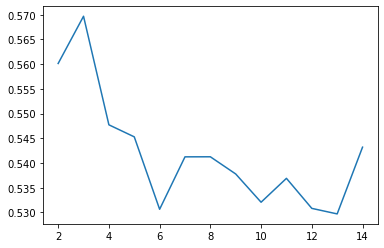

In [227]:
plt.plot(cluster_list,score)

In [228]:
kmeans.set_params(n_clusters = 5)

KMeans(max_iter=10000, n_clusters=5, random_state=1, verbose=3)

In [234]:
kmeans.fit(neigh_df)

Initialization complete
Iteration 0, inertia 87748084.36863858
Iteration 1, inertia 56550476.26619822
Iteration 2, inertia 54821745.96951186
Iteration 3, inertia 54342522.7244085
Iteration 4, inertia 53886311.93422762
Iteration 5, inertia 53606605.44950362
Iteration 6, inertia 53519947.837290056
Iteration 7, inertia 53477181.66606652
Iteration 8, inertia 53437405.06084867
Iteration 9, inertia 53399471.44402816
Iteration 10, inertia 53356591.39695162
Iteration 11, inertia 53317903.00472377
Iteration 12, inertia 53249712.569355845
Iteration 13, inertia 53203230.2713356
Iteration 14, inertia 53132612.812315084
Iteration 15, inertia 52925102.72078422
Iteration 16, inertia 52800610.13985624
Iteration 17, inertia 52751462.98291633
Iteration 18, inertia 52720227.577315874
Iteration 19, inertia 52679423.53914793
Iteration 20, inertia 52588231.03699798
Iteration 21, inertia 52552287.9573026
Iteration 22, inertia 52521079.73565398
Iteration 23, inertia 52462664.92912096
Iteration 24, inertia 523

Iteration 1, inertia 56474576.61748147
Iteration 2, inertia 54546438.49318161
Iteration 3, inertia 53658695.10986302
Iteration 4, inertia 52934111.622760974
Iteration 5, inertia 52502257.40846589
Iteration 6, inertia 52368763.73171402
Iteration 7, inertia 52291839.779844604
Iteration 8, inertia 52220400.98909154
Iteration 9, inertia 52168533.29784655
Iteration 10, inertia 52146528.853016935
Converged at iteration 10: center shift 7.131293863962597 within tolerance 7.962552336928401.


KMeans(max_iter=10000, n_clusters=5, random_state=1, verbose=3)

In [233]:
len(kmeans.labels_)

1752

In [235]:
fig = px.scatter_mapbox(neigh_df,
                        lat = "lat", 
                        lon = "long", 
                        color = kmeans.labels_
                       )



fig.show()